In [18]:
# 🔢 Cell 1 — Install Required Dependencies (OpenAI, dotenv)

%pip install --quiet openai python-dotenv
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 🔢 Cell 2 — Load environment variables and access OpenAI API key

import os
from dotenv import load_dotenv

# Load variables from .env file
load_dotenv()

# Retrieve the OpenAI API key (do not print)
openai_api_key = os.getenv("OPENAI_API_KEY")

# Check if the key was loaded successfully
assert openai_api_key is not None, "OPENAI_API_KEY not found. Please check your .env file."

In [8]:
# 🔢 Cell 3 (Updated) — Initialize OpenAI client using SDK v1.x+

from openai import OpenAI

# Create a reusable client instance
client = OpenAI(api_key=openai_api_key)

# Reusable config
OPENAI_MODEL = "gpt-3.5-turbo-16k"

def run_llm(messages, model=OPENAI_MODEL, temperature=0.2, max_tokens=1000):
    """
    Call OpenAI's chat model using the new v1.x SDK format.
    """
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        max_tokens=max_tokens,
        temperature=temperature
    )
    return response.choices[0].message.content.strip()

In [5]:
# 🔢 Cell 4 (Rewritten) — Define User and Task Context for Ikigai Score Agent

# User Context — professional background and personal values
user_context = {
    "name": "Prabu Arumugam",
    "role": "Technology Advisor",
    "experience_years": 20,
    "expertise": [
        "systems architecture",
        "digital transformation",
        "P&C insurance industry",
        "platform engineering",
        "cloud resilience"
    ],
    "values": [
        "meaningful innovation",
        "technical leadership",
        "mentorship and growth",
        "pragmatic problem-solving"
    ],
    "life_goals": [
        "Build platforms that empower future AI agents",
        "Contribute to resilient, ethical technology",
        "Be at the intersection of innovation and real-world impact"
    ]
}

# Task Context — define the two career paths to be compared using Ikigai
task_context = {
    "objective": "Compare career paths using Ikigai framework",
    "framework": "Ikigai",
    "tone": "reflective and strategic",
    "career_path_1": "AI Agentic Platform Leader",
    "career_path_2": "Cloud Infrastructure Resiliency Leader",
    "dimensions": [
        "What you love",
        "What you're good at",
        "What the world needs",
        "What you can be paid for"
    ],
    "output_style": "table + short narrative recommendation"
}

In [21]:
# 🔢 Cell 6 (Updated) — Call LLM and request structured JSON with scores and recommendation

def build_scored_ikigai_prompt(user, task):
    """
    Builds a prompt for the LLM that includes request for:
    - Ikigai dimension values
    - Scores (0-10) for each dimension
    - Total alignment score
    - Final recommendation
    """
    system_prompt = (
        f"You are an Ikigai Score Agent. Your role is to help users reflect on career path choices "
        f"using the four Ikigai dimensions: what they love, what they are good at, what the world needs, "
        f"and what they can be paid for.\n\n"
        f"Provide output in JSON format ONLY. Include:\n"
        f"- The 4 Ikigai dimensions (as lists of phrases)\n"
        f"- A numeric score (0–10) for each dimension\n"
        f"- A total alignment score (out of 40)\n"
        f"- A final recommendation (as a string)\n"
    )

    user_prompt = (
        f"User: {user['name']}\n"
        f"Role: {user['role']}\n"
        f"Experience: {user['experience_years']} years\n"
        f"Expertise: {', '.join(user['expertise'])}\n"
        f"Values: {', '.join(user['values'])}\n"
        f"Life Goals: {', '.join(user['life_goals'])}\n\n"
        f"Task Objective: {task['objective']}\n"
        f"Career Path 1: {task['career_path_1']}\n"
        f"Career Path 2: {task['career_path_2']}\n"
        f"Dimensions to Evaluate: {', '.join(task['dimensions'])}\n"
        f"Output Format:\n"
        f"{{\n"
        f"  \"{task['career_path_1']}\": {{\n"
        f"    \"love\": [...],\n"
        f"    \"good_at\": [...],\n"
        f"    \"world_needs\": [...],\n"
        f"    \"paid_for\": [...],\n"
        f"    \"scores\": {{\n"
        f"      \"love\": 0–10,\n"
        f"      \"good_at\": 0–10,\n"
        f"      \"world_needs\": 0–10,\n"
        f"      \"paid_for\": 0–10,\n"
        f"      \"total\": 0–40\n"
        f"    }}\n"
        f"  }},\n"
        f"  \"{task['career_path_2']}\": {{ same structure }},\n"
        f"  \"recommendation\": \"...\"\n"
        f"}}"
    )

    return [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ]

# Generate the prompt and call the LLM
ikigai_structured_messages = build_scored_ikigai_prompt(user_context, task_context)
ikigai_raw_response = run_llm(ikigai_structured_messages, max_tokens=1500)

# Display raw response for parsing
print(ikigai_raw_response)

{
  "AI Agentic Platform Leader": {
    "love": [
      "Building platforms",
      "Empowering AI agents",
      "Being at the intersection of innovation and real-world impact"
    ],
    "good_at": [
      "Systems architecture",
      "Digital transformation",
      "Platform engineering"
    ],
    "world_needs": [
      "Meaningful innovation",
      "Resilient and ethical technology"
    ],
    "paid_for": [
      "Technology advisory",
      "AI platform leadership"
    ],
    "scores": {
      "love": 8,
      "good_at": 9,
      "world_needs": 8,
      "paid_for": 7,
      "total": 32
    }
  },
  "Cloud Infrastructure Resiliency Leader": {
    "love": [
      "Ensuring cloud resilience",
      "Problem-solving",
      "Being at the forefront of technology"
    ],
    "good_at": [
      "Systems architecture",
      "Platform engineering",
      "Cloud resilience"
    ],
    "world_needs": [
      "Resilient technology",
      "Cloud infrastructure expertise"
    ],
    "paid_

In [22]:
# 🔢 Cell 6 — Call OpenAI LLM and get Ikigai evaluation result

ikigai_result = run_llm(ikigai_messages)

# Display the response from the Ikigai Score Agent
print(ikigai_result)

To compare the two career paths of AI Agentic Platform Leader and Cloud Infrastructure Resiliency Leader, let's evaluate them using the four dimensions of the Ikigai framework: what you love, what you're good at, what the world needs, and what you can be paid for. 

| Dimensions                 | AI Agentic Platform Leader | Cloud Infrastructure Resiliency Leader |
|----------------------------|----------------------------|---------------------------------------|
| What you love              | Building platforms that empower future AI agents, being at the intersection of innovation and real-world impact | Contributing to resilient, ethical technology, meaningful innovation |
| What you're good at        | Systems architecture, digital transformation, platform engineering | Systems architecture, cloud resilience |
| What the world needs       | Ethical and responsible AI platforms, innovation that has real-world impact | Resilient cloud infrastructure, ensuring data security and availab

In [23]:
# 🔢 Cell 7 — Define Ikigai dimension values for both roles

ikigai_data = {
    "AI Agentic Platform Leader": {
        "love": ["creative innovation", "building AI agents"],
        "good_at": ["architecture", "platform thinking"],
        "world_needs": ["autonomous systems", "AI safety"],
        "paid_for": ["LLM platform strategy", "emerging tech leadership"]
    },
    "Cloud Infrastructure Resiliency Leader": {
        "love": ["stability", "problem-solving"],
        "good_at": ["resilience design", "site reliability"],
        "world_needs": ["always-on infra", "cyber resilience"],
        "paid_for": ["cloud ops", "disaster recovery expertise"]
    }
}


In [26]:
# 🔢 Cell 7.5 (Enhanced) — Parse JSON response and display Ikigai scores + recommendation

import json
import re

def extract_json_from_text(text):
    """
    Extracts and parses the first valid JSON object from the LLM response.
    """
    match = re.search(r'\{.*\}', text, re.DOTALL)
    if match:
        try:
            return json.loads(match.group())
        except json.JSONDecodeError as e:
            print("⚠️ Failed to decode JSON:", e)
            return None
    else:
        print("⚠️ No JSON block found.")
        return None

# Parse the LLM output
ikigai_data = extract_json_from_text(ikigai_raw_response)

# Display results if successful
if ikigai_data:
    print("✅ Parsed JSON successfully.\n")

    for role in list(ikigai_data.keys()):
        if role == "recommendation":
            continue
        scores = ikigai_data[role].get("scores", {})
        print(f"🔹 {role}")
        for dim in ["love", "good_at", "world_needs", "paid_for"]:
            print(f"  {dim.title().replace('_', ' ')} Score: {scores.get(dim, 'N/A')}/10")
        print(f"  🧮 Total Score: {scores.get('total', 'N/A')}/40\n")

    # Show recommendation if available
    if "recommendation" in ikigai_data:
        print("📌 Recommendation:\n", ikigai_data["recommendation"])
else:
    print("❌ Could not parse or process the response.")

✅ Parsed JSON successfully.

🔹 AI Agentic Platform Leader
  Love Score: 8/10
  Good At Score: 9/10
  World Needs Score: 8/10
  Paid For Score: 7/10
  🧮 Total Score: 32/40

🔹 Cloud Infrastructure Resiliency Leader
  Love Score: 7/10
  Good At Score: 8/10
  World Needs Score: 7/10
  Paid For Score: 8/10
  🧮 Total Score: 30/40

📌 Recommendation:
 Based on your scores, pursuing a career as an AI Agentic Platform Leader aligns more closely with your passions, skills, the world's needs, and potential income. This career path allows you to build platforms that empower future AI agents, contribute to resilient and ethical technology, and be at the intersection of innovation and real-world impact. Consider exploring opportunities in technology advisory and AI platform leadership roles.


/opt/anaconda3/envs/navigator-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/navigator-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/navigator-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


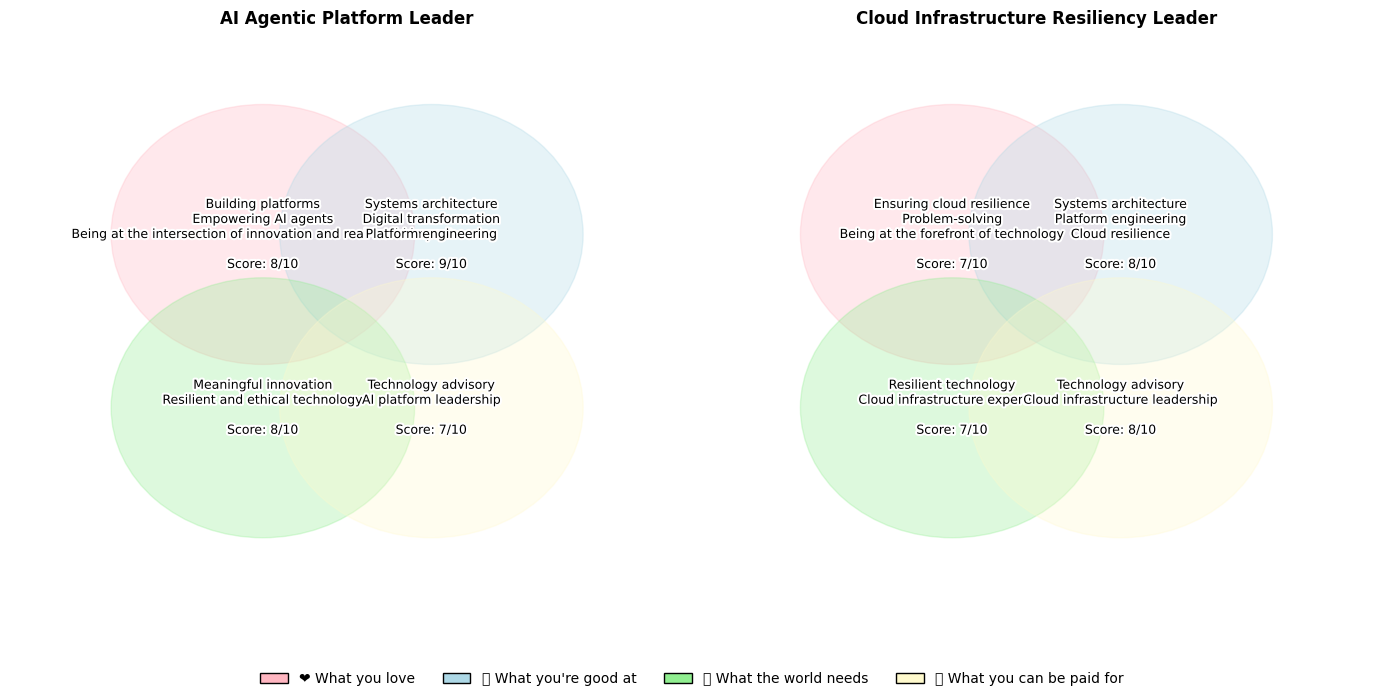

In [28]:
# 🔢 Cell 8 (Final Refactor) — Ikigai diagram with dimension legend

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Patch
import matplotlib.patheffects as path_effects

def plot_ikigai_venn_with_scores(role_name, role_data, ax):
    coords = {
        "love": (-0.5, 0.6),
        "good_at": (0.5, 0.6),
        "world_needs": (-0.5, -0.6),
        "paid_for": (0.5, -0.6)
    }

    colors = {
        "love": "#FFB6C1",
        "good_at": "#ADD8E6",
        "world_needs": "#90EE90",
        "paid_for": "#FFFACD"
    }

    dimensions = ["love", "good_at", "world_needs", "paid_for"]
    scores = role_data.get("scores", {})

    for dim in dimensions:
        x, y = coords[dim]
        circle = Circle((x, y), 0.9, alpha=0.3, color=colors[dim])
        ax.add_patch(circle)

        phrases = "\n".join(role_data.get(dim, []))
        score = scores.get(dim, "N/A")
        label = f"{phrases}\n\nScore: {score}/10"

        ax.text(x, y, label, ha='center', va='center', fontsize=9,
                path_effects=[path_effects.withStroke(linewidth=3, foreground="white")])

    ax.set_title(role_name, fontsize=12, fontweight='bold')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.axis('off')

# Setup plots and legend
roles = [k for k in ikigai_data.keys() if k != "recommendation"]
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for i, role in enumerate(roles):
    plot_ikigai_venn_with_scores(role, ikigai_data[role], axes[i])

# Add legend
legend_elements = [
    Patch(facecolor="#FFB6C1", edgecolor='k', label="❤️ What you love"),
    Patch(facecolor="#ADD8E6", edgecolor='k', label="🧠 What you're good at"),
    Patch(facecolor="#90EE90", edgecolor='k', label="🌍 What the world needs"),
    Patch(facecolor="#FFFACD", edgecolor='k', label="💸 What you can be paid for")
]

# Place legend centered below the plots
fig.legend(handles=legend_elements, loc='lower center', ncol=4, fontsize='medium', frameon=False)

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Make space for legend
plt.show()